In [31]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage

In [9]:
image = cv2.imread("airplane.png")
mask = cv2.imread("mask_airplane.png",0)
print(image.shape)
print(mask.shape)
masked = cv2.bitwise_and(image, image, mask=mask)

(512, 512, 3)
(512, 512)


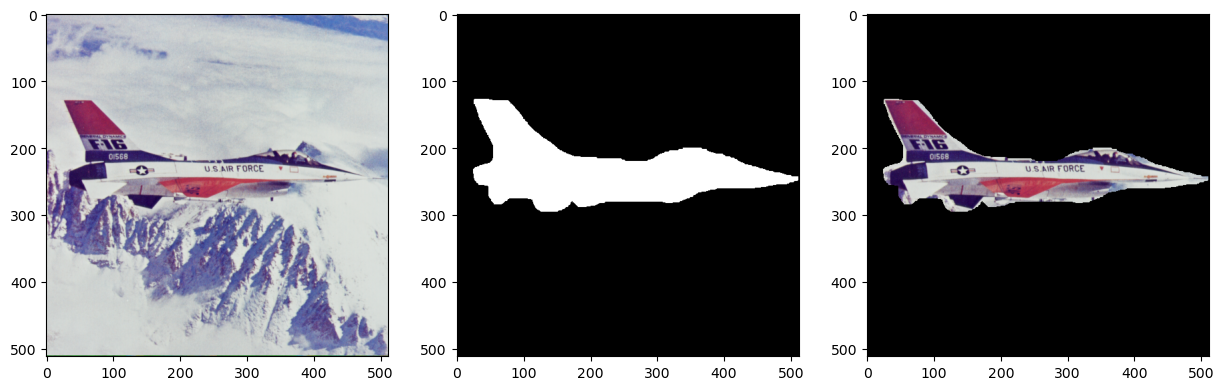

In [65]:
fig,axes =  plt.subplots(1, 3,figsize = (15,5))


axes[0].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(mask, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2].imshow(cv2.cvtColor(masked,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

In [12]:
resize_mask = cv2.resize(mask,dsize=(512-128,512-128)) 
resize_masked = cv2.resize(masked,dsize=(512-128,512-128)) 


In [14]:
print(resize_masked.shape)

(384, 384, 3)


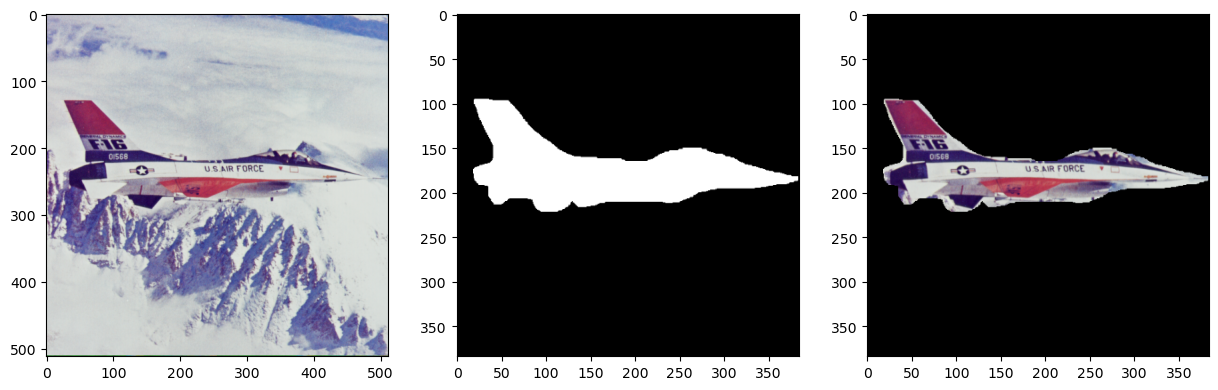

In [53]:
fig,axes =  plt.subplots(1, 3,figsize = (15,5))
# axes[0].set_axis_off()
# axes[1].set_axis_off()
# axes[2].set_axis_off()

axes[0].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(resize_mask, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2].imshow(cv2.cvtColor(resize_masked,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

In [60]:
new_mask = np.zeros((512,512),dtype= np.uint8)
new_masked = np.zeros((512,512,3),dtype=np.uint8)

In [61]:
dx = -128
dy = -100
new_mask[128+dx:128+dx+384,128+dy:128+dy+384] = resize_mask
new_masked[128+dx:128+dx+384,128+dy:128+dy+384]  = resize_masked

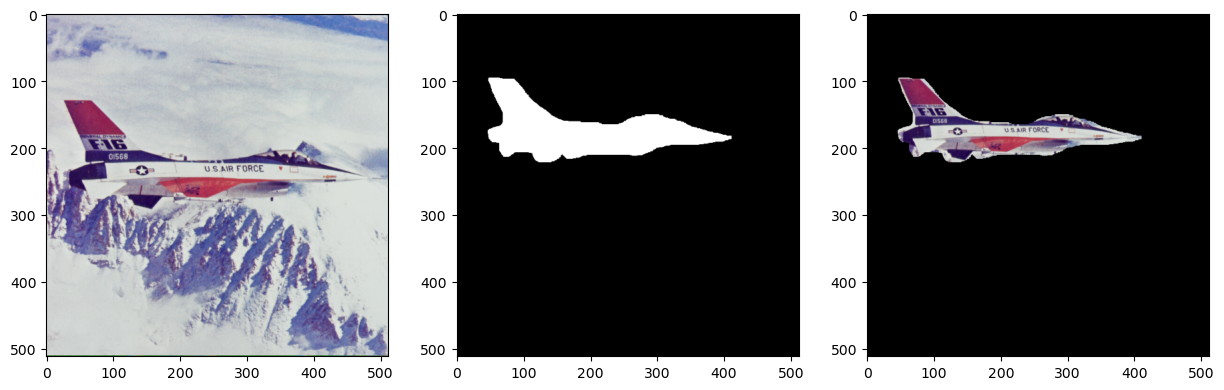

In [62]:
fig,axes =  plt.subplots(1, 3,figsize = (15,5))


axes[0].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(new_mask, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2].imshow(cv2.cvtColor(new_masked,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

In [63]:
mask_inv = cv2.bitwise_not(new_mask)
img1_bg = cv2.bitwise_and(image,image,mask = mask_inv)
img2_object =  cv2.bitwise_and(new_masked,new_masked,mask = new_mask)
temp_img = cv2.add(img1_bg,img2_object)

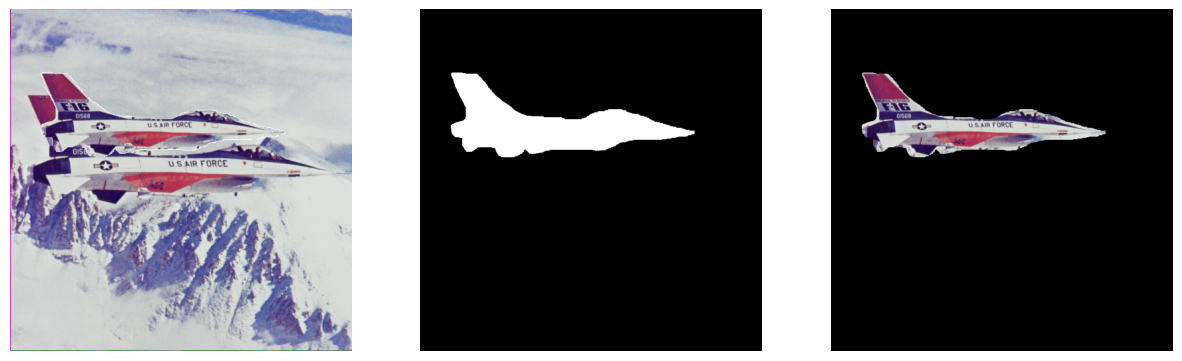

In [64]:
fig,axes =  plt.subplots(1, 3,figsize = (15,5))
axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()

axes[0].imshow(cv2.cvtColor(temp_img,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(new_mask, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2].imshow(cv2.cvtColor(new_masked,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

In [44]:
rotation_mask = ndimage.rotate(resize_mask,45,reshape=False)
rotation_masked = ndimage.rotate(resize_masked,45,reshape=False)

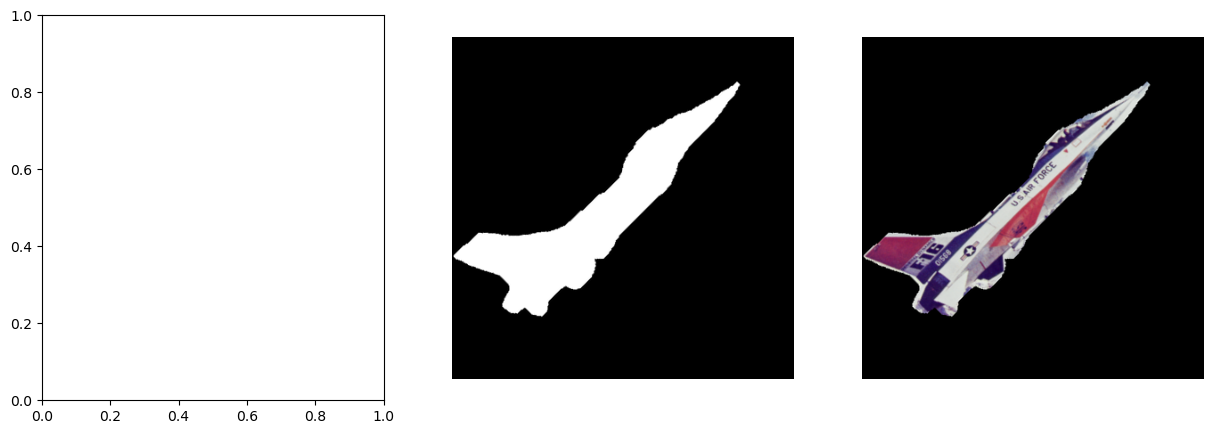

In [45]:
fig,axes =  plt.subplots(1, 3,figsize = (15,5))

axes[1].set_axis_off()
axes[2].set_axis_off()


axes[1].imshow(rotation_mask, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2].imshow(cv2.cvtColor(rotation_masked,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

In [46]:
rotation_mask.shape

(384, 384)